# Custom Structure Animal Classification with VGG16

This notebook demonstrates using a pre-trained VGG16 model to classify images of animals native to Ontario.  
The animals included are red fox, mink, beaver, and black bear.  
The process includes:
- Using a custom dataset structure,
- Extracting features using a pre-trained model,
- Training a classification model using Keras and TensorFlow.


In [1]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.16.2
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Importing necessary libraries
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical


In [3]:
# Define the correct base directory
base_dir = '/Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data'

# Paths to training folders for each animal class
train_dirs = [
    os.path.join(base_dir, 'red_fox/data/train/red_fox'),
    os.path.join(base_dir, 'black_bear/data/train/black_bear'),
    os.path.join(base_dir, 'beaver/data/train/beaver'),
    os.path.join(base_dir, 'mink/data/train/mink')
]

# Paths to validation folders for each animal class
val_dirs = [
    os.path.join(base_dir, 'red_fox/data/val/red_fox'),
    os.path.join(base_dir, 'black_bear/data/val/black_bear'),
    os.path.join(base_dir, 'beaver/data/val/beaver'),
    os.path.join(base_dir, 'mink/data/val/mink')
]


In [4]:
# Map class names to numeric indices
class_indices = {
    'beaver': 0,
    'black_bear': 1,
    'mink': 2,
    'red_fox': 3
}


In [11]:
# Custom generator to yield batches of images with one-hot encoded labels
def custom_generator_with_labels(generators, class_indices):
    """
    This function combines multiple data generators and maps their outputs 
    to one-hot encoded labels for training or validation.
    """
    while True:
        for gen in generators:
            x, y = next(gen)
            class_name = list(gen.class_indices.keys())[0]
            class_index = class_indices[class_name]
            y_one_hot = to_categorical([class_index] * len(y), num_classes=4)
            yield x, y_one_hot


In [12]:
# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Function to create generators for each class folder
def create_generators(datagen, dirs):
    """
    Creates a list of data generators for each folder.
    """
    generators = []
    for dir_path in dirs:
        if os.path.exists(dir_path):
            gen = datagen.flow_from_directory(
                os.path.dirname(dir_path),
                target_size=(224, 224),
                classes=[os.path.basename(dir_path)],
                batch_size=32,
                class_mode='categorical'
            )
            generators.append(gen)
    return generators

# Create generators for training and validation
train_generators = create_generators(train_datagen, train_dirs)
val_generators = create_generators(val_datagen, val_dirs)


Found 1395 images belonging to 1 classes.
Found 1297 images belonging to 1 classes.
Found 1303 images belonging to 1 classes.
Found 1317 images belonging to 1 classes.
Found 346 images belonging to 1 classes.
Found 379 images belonging to 1 classes.
Found 405 images belonging to 1 classes.
Found 412 images belonging to 1 classes.


In [13]:
# Verify training directories and image counts
print("Verifying training directories and image counts...")
for path in train_dirs:
    if os.path.exists(path):
        print(f"Found: {path} - {len(os.listdir(path))} images")
    else:
        print(f"Missing: {path}")

# Verify validation directories and image counts
print("\nVerifying validation directories and image counts...")
for path in val_dirs:
    if os.path.exists(path):
        print(f"Found: {path} - {len(os.listdir(path))} images")
    else:
        print(f"Missing: {path}")


Verifying training directories and image counts...
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/red_fox/data/train/red_fox - 1395 images
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/black_bear/data/train/black_bear - 1297 images
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/beaver/data/train/beaver - 1303 images
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/mink/data/train/mink - 1317 images

Verifying validation directories and image counts...
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/red_fox/data/val/red_fox - 346 images
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/black_bear/data/val/black_bear - 379 images
Found: /Users/EliseZamora_1/Documents/School/Education/Animal_Classification_Project/data/beaver/data/val/beave

In [14]:
# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create generators for each training and validation directory
train_generators = [train_datagen.flow_from_directory(
    os.path.dirname(path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
) for path in train_dirs]

val_generators = [val_datagen.flow_from_directory(
    os.path.dirname(path),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
) for path in val_dirs]

# Verify generators
print("\nTraining generators:")
for i, gen in enumerate(train_generators):
    print(f"Generator {i + 1}: {gen.samples} samples, classes: {gen.class_indices}")

print("\nValidation generators:")
for i, gen in enumerate(val_generators):
    print(f"Generator {i + 1}: {gen.samples} samples, classes: {gen.class_indices}")


Found 1395 images belonging to 1 classes.
Found 1297 images belonging to 1 classes.
Found 1343 images belonging to 2 classes.
Found 1317 images belonging to 1 classes.
Found 346 images belonging to 1 classes.
Found 379 images belonging to 1 classes.
Found 425 images belonging to 2 classes.
Found 412 images belonging to 1 classes.

Training generators:
Generator 1: 1395 samples, classes: {'red_fox': 0}
Generator 2: 1297 samples, classes: {'black_bear': 0}
Generator 3: 1343 samples, classes: {'animal beaver': 0, 'beaver': 1}
Generator 4: 1317 samples, classes: {'mink': 0}

Validation generators:
Generator 1: 346 samples, classes: {'red_fox': 0}
Generator 2: 379 samples, classes: {'black_bear': 0}
Generator 3: 425 samples, classes: {'animal beaver': 0, 'beaver': 1}
Generator 4: 412 samples, classes: {'mink': 0}


In [15]:
print("Class indices:", class_indices)

Class indices: {'beaver': 0, 'black_bear': 1, 'mink': 2, 'red_fox': 3}


In [17]:
# Custom generator with labels for combining multiple generators
def custom_generator_with_labels(generators, class_indices):
    """
    Custom generator that combines multiple generators and ensures proper labeling.

    Args:
        generators (list): List of data generators.
        class_indices (dict): Dictionary mapping class names to numeric indices.

    Yields:
        tuple: Batch of images and their corresponding labels in one-hot encoded form.
    """
    while True:
        for gen in generators:
            x, y = next(gen)  # Fetch the next batch of data
            y = np.argmax(y, axis=1)  # Convert one-hot encoding to class indices
            yield x, to_categorical(y, num_classes=len(class_indices))  # Return x and updated y

# Combine generators using the updated custom generator with labels
train_generator_combined = custom_generator_with_labels(train_generators, class_indices)
val_generator_combined = custom_generator_with_labels(val_generators, class_indices)

# Test the combined generator to confirm it works
x_batch, y_batch = next(train_generator_combined)
print("Combined train generator - x_batch shape:", x_batch.shape)
print("Combined train generator - y_batch shape:", y_batch.shape)


Combined train generator - x_batch shape: (32, 224, 224, 3)
Combined train generator - y_batch shape: (32, 4)


In [18]:
# Check a batch from the training generator
x_batch, y_batch = next(train_generator_combined)
print(f"Train batch shape: {x_batch.shape}, {y_batch.shape}")

# Check a batch from the validation generator
x_val_batch, y_val_batch = next(val_generator_combined)
print(f"Validation batch shape: {x_val_batch.shape}, {y_val_batch.shape}")


Train batch shape: (32, 224, 224, 3), (32, 4)
Validation batch shape: (32, 224, 224, 3), (32, 4)


In [19]:
# Load the pre-trained VGG16 model without the top layers
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base layers
conv_base.trainable = False

# Build the classification model
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Replace 4 with the actual number of classes if needed
])


2024-12-13 11:35:30.242345: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2024-12-13 11:35:30.242382: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-12-13 11:35:30.242394: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-12-13 11:35:30.242637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-13 11:35:30.242653: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)


In [21]:
# Train the model
history = model.fit(
    train_generator_combined,  # Combined training data generator
    validation_data=val_generator_combined,  # Validation data generator
    steps_per_epoch=sum(gen.samples // gen.batch_size for gen in train_generators),  # Total steps per epoch
    validation_steps=sum(gen.samples // gen.batch_size for gen in val_generators),  # Total validation steps
    epochs=10,  # Number of epochs
    verbose=1  # Ensure that training progress is printed to the console
)


Epoch 1/10


2024-12-13 11:35:34.401985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


165/165 ━━━━━━━━━━━━━━━━━━━━ 25s 136ms/step - accuracy: 0.6098 - loss: 1.8110 - val_accuracy: 0.7536 - val_loss: 0.7206
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.6869 - loss: 1.1503 - val_accuracy: 0.8006 - val_loss: 0.5187
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 146ms/step - accuracy: 0.6779 - loss: 1.1395 - val_accuracy: 0.8110 - val_loss: 0.5270
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 23s 139ms/step - accuracy: 0.6947 - loss: 1.0904 - val_accuracy: 0.8075 - val_loss: 0.5931
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.6926 - loss: 1.1681 - val_accuracy: 0.8152 - val_loss: 0.5935
Epoch 6/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 133ms/step - accuracy: 0.7097 - loss: 1.0373 - val_accuracy: 0.8106 - val_loss: 0.6010
Epoch 7/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - accuracy: 0.7127 - loss: 1.0415 - val_accuracy: 0.8222 - val_loss: 0.5418
Epoch 8/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 216ms/step - accuracy: 0.7121 - loss: 1.0674 - val

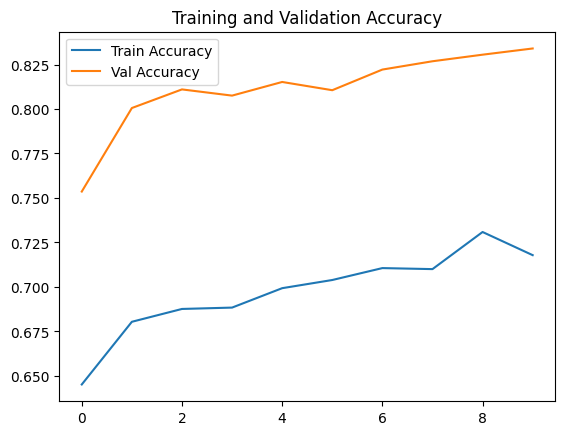

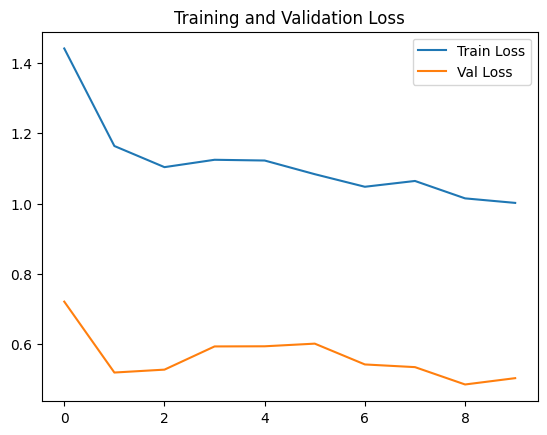

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [23]:
# Evaluate the model on the test set
test_generator_combined = custom_generator_with_labels(val_generators, class_indices)
test_steps = sum(gen.samples // gen.batch_size for gen in val_generators)
test_loss, test_acc = model.evaluate(test_generator_combined, steps=test_steps)
print(f"Test Accuracy: {test_acc:.2f}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8300 - loss: 0.4946
Test Accuracy: 0.83
